In [7]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

C:\Users\Deon\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [23]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [24]:
BAC = DataReader('BAC','yahoo',start,end)

In [25]:
BAC.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,15.852937,16.009008,15.666309,15.840000,9.666912e+07,15.734065
std,1.746949,1.721846,1.772251,1.747621,4.677012e+07,1.700568
min,11.460000,11.550000,10.990000,11.160000,2.293750e+07,11.117695
25%,14.375000,14.630000,14.100000,14.397500,6.606248e+07,14.350394
50%,16.340000,16.464999,16.150001,16.345000,8.235195e+07,16.190168
75%,17.262500,17.402500,17.092500,17.299999,1.163548e+08,17.200198
max,18.389999,18.480000,18.080000,18.450001,3.750887e+08,18.269640


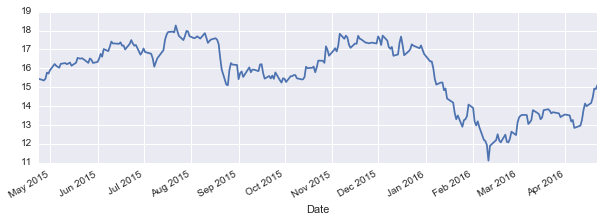

In [26]:
#plotting historical data based on adjusted close price

BAC['Adj Close'].plot(figsize = (10,3))

#An adjusted closing price is a stock's closing price on any given day of trading that has been amended to 
#include any distributions and corporate actions that occurred at any time prior to the next day's open. 
#The adjusted closing price is often used when examining historical returns or performing a detailed analysis 
#on historical returns.

#Read more: Adjusted Closing Price Definition | Investopedia http://www.investopedia.com/terms/a/adjusted_closing_price.asp#ixzz46mnWl6Sc 


Axes(0.125,0.2;0.775x0.7)


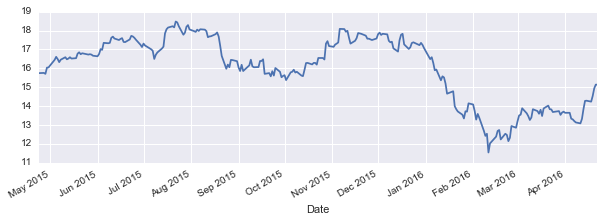

In [33]:
print BAC['High'].plot(figsize = (10,3))

## Understanding moving averages and using it in the analysis

In [34]:
#I refered http://www.investopedia.com/terms/m/movingaverage.asp for information on moving averages

C:\Users\Deon\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  if __name__ == '__main__':


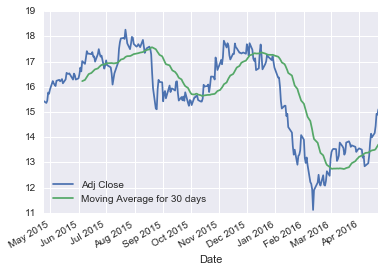

In [38]:
BAC['Moving Average for 30 days'] = pd.rolling_mean(BAC['Adj Close'],30)
BAC[['Adj Close','Moving Average for 30 days']].plot()

## Daily returns and Risk

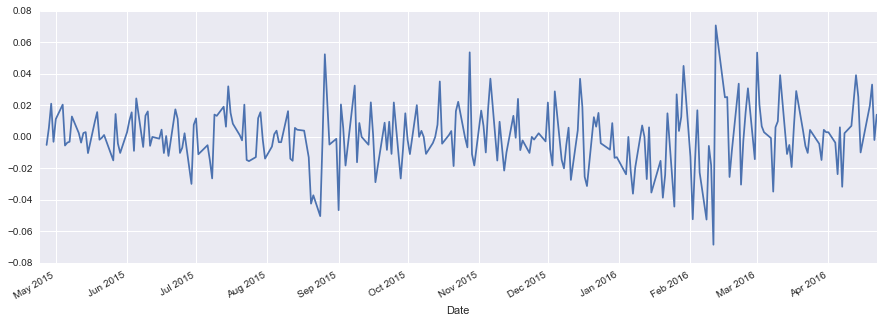

In [47]:
BAC['Daily Returns'] = BAC['Adj Close'].pct_change()
BAC['Daily Returns'].plot(figsize = (15,5))


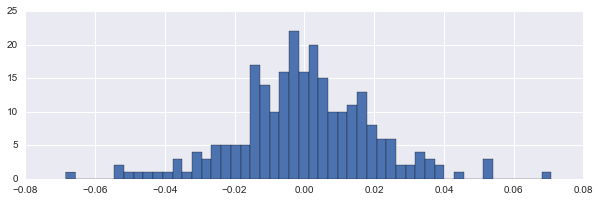

In [52]:
BAC['Daily Returns'].hist(bins = 50,figsize = (10,3) )

In [55]:
closing_df = DataFrame(BAC['Adj Close'])
closing_df.head()

,Adj Close
Date,
2015-04-24,15.440797
2015-04-27,15.361816
2015-04-28,15.450669
2015-04-29,15.776466
2015-04-30,15.727103


In [56]:
tech_rets = closing_df.pct_change()

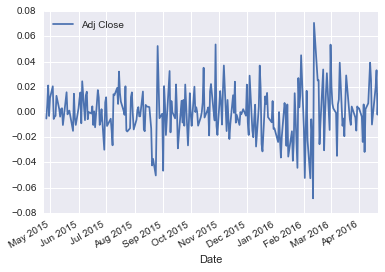

In [57]:
tech_rets.plot()

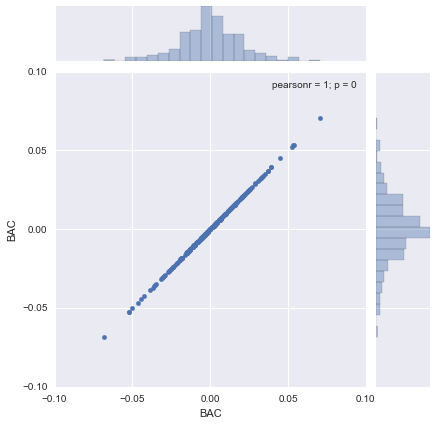

In [87]:
tech_rets.columns = ['BAC']
sns.jointplot('BAC','BAC',tech_rets,kind='scatter') #could compare to other stocks to look at correlation amongst industries/firms

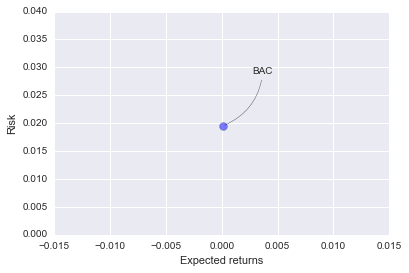

In [86]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

## Value at Risk

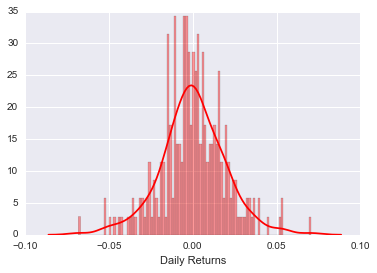

In [94]:
sns.distplot(BAC['Daily Returns'].dropna(),bins=100,color='red')

In [97]:
rets['BAC'].quantile(0.05)

-0.031432106139270777

In [ ]:
#The 0.05 empirical quantile of daily returns is at -0.031. 
#That means that with 95% confidence, our worst daily loss will not exceed 3.1%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is 0.031 * 1,000,000 = $31,000.